<a href="https://colab.research.google.com/github/Saad7912/MNIST_digit-classfication-/blob/main/MNIST_digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
type(X_train)

numpy.ndarray

In [8]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [9]:
# printing the 1 image

print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [10]:
# printing the 1th image shape

print(X_train[1].shape)

(28, 28)


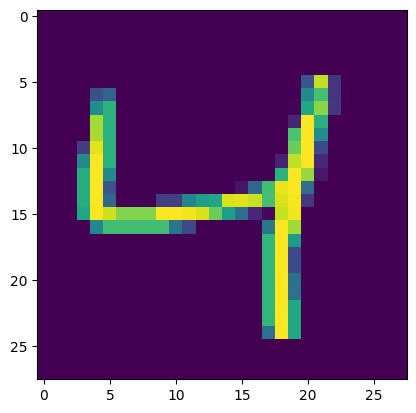

2


In [11]:
# displaying the image
from google.colab.patches import cv2_imshow

plt.imshow(X_train[2])
plt.show()

# print the corresponding label
print(Y_train[25])

In [12]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [13]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
# scaling the values
# Normalizing these values

X_train = X_train/255
X_test = X_test/255

In [15]:
# printing the 1st image

print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1025 - accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1035 - accuracy: 0.9694
0.9693999886512756


In [20]:
print(X_test.shape)

(10000, 28, 28)


In [21]:
X_test[0].shape

(28, 28)

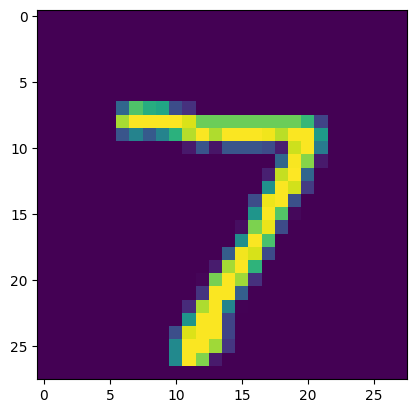

In [22]:
plt.imshow(X_test[0])
plt.show()

In [23]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])

[2.9081425e-03 3.9720051e-02 8.4209755e-02 5.5865955e-01 5.1159642e-08
 1.6155699e-02 1.8453425e-08 9.9999774e-01 9.9882893e-03 3.6403645e-02]


In [26]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [27]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]


In [29]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 958    0    1    2    0    6    7    2    4    0]
 [   0 1125    2    1    0    1    2    1    3    0]
 [   4    3  995   12    1    0    2    7    7    1]
 [   1    1    4  972    0   21    0    3    3    5]
 [   2    2    2    1  940    3   11    1    2   18]
 [   2    0    0    3    1  879    3    1    2    1]
 [   2    1    0    0    4   10  938    0    2    1]
 [   1    6    9    6    1    1    0  999    3    2]
 [   8    0    1    9    6   18    6    4  918    4]
 [   2    3    0    5    6   11    0    9    5  968]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

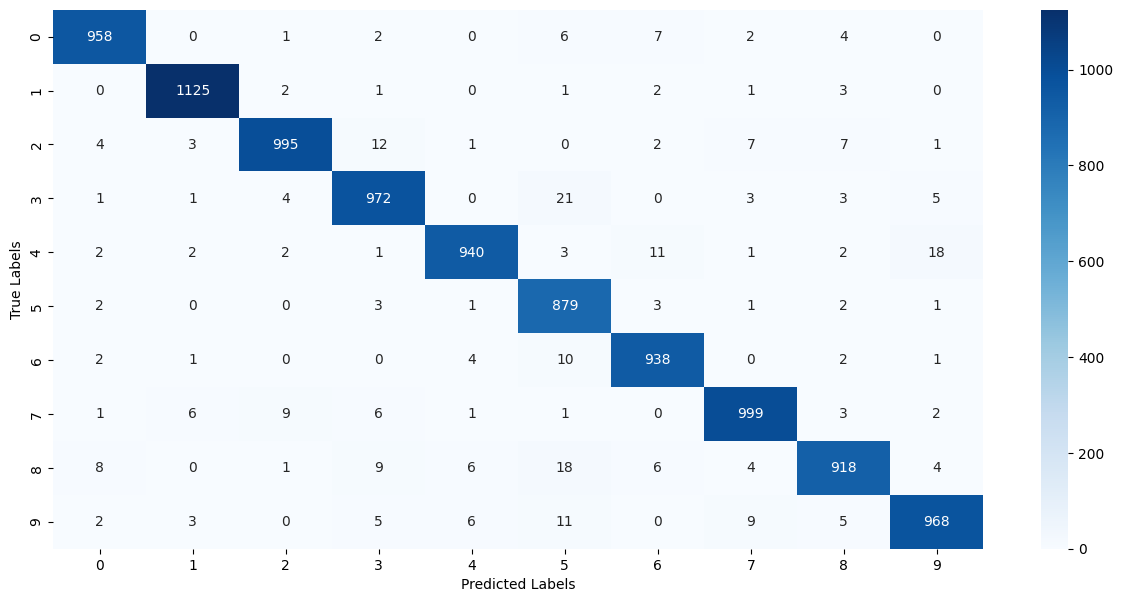

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [63]:
input_image_path = '/content/Mnist 6.jpg'

input_image = cv2.imread(input_image_path)

In [64]:
type(input_image)

numpy.ndarray

In [65]:
print(input_image)

[[[45 45 45]
  [14 14 14]
  [15 15 15]
  ...
  [24 24 24]
  [26 26 26]
  [ 1  1  1]]

 [[33 33 33]
  [ 2  2  2]
  [ 4  4  4]
  ...
  [17 17 17]
  [22 22 22]
  [ 1  1  1]]

 [[30 30 30]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [21 21 21]
  [29 29 29]
  [ 1  1  1]]

 ...

 [[43 43 43]
  [29 29 29]
  [39 39 39]
  ...
  [33 33 33]
  [24 24 24]
  [ 1  1  1]]

 [[20 20 20]
  [15 15 15]
  [28 28 28]
  ...
  [21 21 21]
  [ 8  8  8]
  [ 1  1  1]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]]


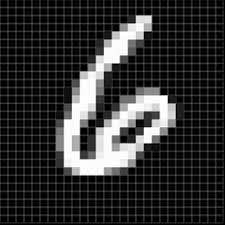

In [66]:
cv2_imshow(input_image)

In [67]:
input_image.shape

(225, 225, 3)

In [68]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [69]:
grayscale.shape

(225, 225)

In [70]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [71]:
input_image_resize.shape

(28, 28)

In [72]:
cv2_imshow(input_image_resize)

In [73]:
input_image_resize = input_image_resize/255

In [74]:
type(input_image_resize)

numpy.ndarray

In [75]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [76]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[2.43954375e-01 5.42085618e-05 4.64651920e-03 1.99339841e-03
  1.62357181e-01 9.83087301e-01 1.00000000e+00 1.18569346e-06
  9.46699798e-01 1.36500355e-02]]


In [77]:
input_pred_label = np.argmax(input_prediction)

In [78]:
print(input_pred_label)

6


Path of the image to be predicted: /content/Mnist 7.png


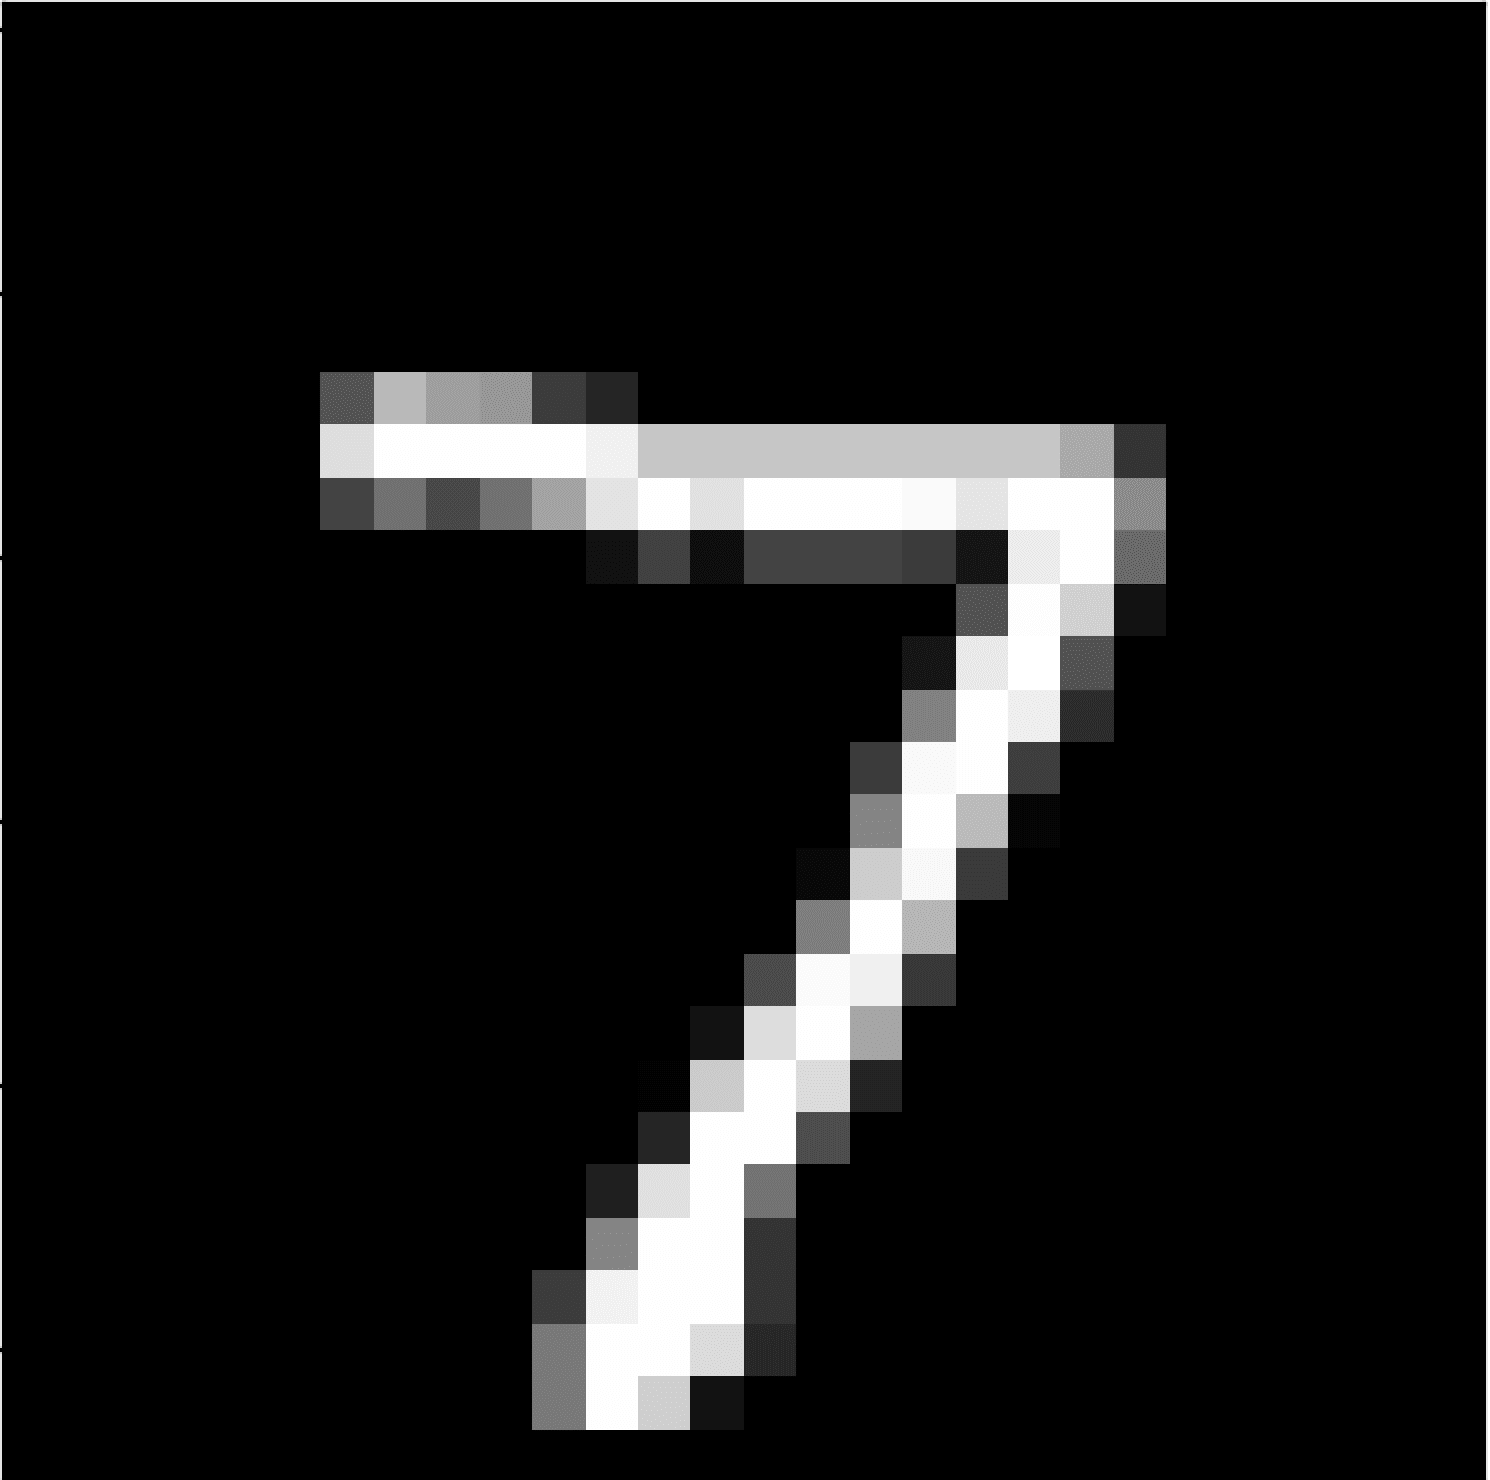

1/1 [==============================] - 0s 26ms/step
The Handwritten Digit is recognised as  7


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)